In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as wd
from ipywidgets import interact
import seaborn as sns
#import ptitprince as pt
import re #I import this library 'cause I need to deal with regular expressions
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree
#from yellowbrick.cluster import KElbowVisualizer
from sklearn import metrics
sns.set_style('whitegrid')
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PowerTransformer # para usar Yeo-Johnson
from scipy.stats import skew
from sklearn.metrics import r2_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
#Here I call the files of my second dataset in order to use it on the CoderHouse data science project
file1="bands.csv"
file2="reviews.csv"
file3="albums.csv"

#Here I read the csv files and define the dataframes
bands=pd.read_csv(file1)
reviews=pd.read_csv(file2)
albums=pd.read_csv(file3)
Spotify_file='Spotify_extracted.csv'
Spotify_df=pd.read_csv(Spotify_file)
newDb="death_metal.csv"
newDBdf=pd.read_csv(newDb)

In [3]:
bands

,id,name,country,status,formed_in,genre,theme,active
0,1,('M') Inc.,United States,Unknown,2009.0,Death Metal,NaN,2009-?
1,2,(sic),United States,Split-up,1993.0,Death Metal,NaN,1993-1996
2,3,.F.O.A.D.,France,Active,2009.0,Death Metal,Life and Death,2009-present
3,4,100 Suns,United States,Active,2004.0,Death Metal,NaN,2004-present
4,5,12 Days of Anarchy,United States,Split-up,1998.0,Death Metal,Anarchy,1998-2002
...,...,...,...,...,...,...,...,...
37718,37719,Gladiator,Slovakia,Active,1988.0,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...,Sorrow| Nuclear War| Doom,1988-present
37719,37720,Innersight,Hungary,Active,1997.0,Post-Rock (early)| Progressive Death Metal (mi...,NaN,1997-present
37720,37721,Lunarsapian,International,Active,2008.0,Black/Death/Doom Metal (early)| Drone/Dark Amb...,NaN,2008-present
37721,37722,Subconscious,Germany,Active,1990.0,Progressive Thrash/Death Metal (1992| 2002-pre...,NaN,1990-1997| 2002-present


In [4]:
reviews

,id,album,title,score,content
0,1,4,The Killer Count Just Keeps Rising,0.88,When I first threw this on I really didnt know...
1,2,5,A gem of heterogeneous death metal...,0.96,Several years ago I bought from a band member|...
2,3,8,Fantasic| if mostly for its influences,0.83,What a wonderful release this is. ‘Vox Fatum’ ...
3,4,45,A rare| lost hidden gem,0.80,Picture this: crushing| brutal death metal| wi...
4,5,54,Pure| but flayed and covered in soot,0.92,Abhordium's When Depravity Incarnates is an ex...
...,...,...,...,...,...
21505,21506,28061,Delightful,0.89,What can a man accomplish in two years? Well| ...
21506,21507,28065,Frozen Mist White Noise Paranormal,0.80,Every now and then I stumble upon a really coo...
21507,21508,28065,Terrifying experimental death metal,0.80,Crawling out from Montoursville Pennysylvania ...
21508,21509,28066,Frozen Mist Anomalies Of The Forest,0.80,Deep in the mountain forest of Pennsylvania lu...


In [5]:
reviews.duplicated(subset='id',keep='first').sum()

0

In [6]:
albums

,id,band,title,year
0,1,1,Taste the Hate,2014
1,2,3,The Bringer of Death,2014
2,3,4,Deception| Calculate What You Can't See,2005
3,4,7,Inti Huacay,1998
4,5,7,Génesis & horror,2002
...,...,...,...,...
28064,28065,37723,White Noise Paranormal,2010
28065,28066,37723,Anomalies of the Forest,2011
28066,28067,37723,Mother Earth Pantheon,2012
28067,28068,37723,Paganwinds,2014


In [61]:
albums.loc[albums['band']==37723]

,id,band,title,year
28048,28049,37723,Nightmares of the Autumn Succubus,2004
28049,28050,37723,Return to Capcomia,2004
28050,28051,37723,The 5th Season,2004
28051,28052,37723,October Harvest,2004
28052,28053,37723,Cemetery Rain,2004
28053,28054,37723,Winterasylum,2005
28054,28055,37723,Resonate,2005
28055,28056,37723,Traverse thru Realms of Nevermore,2005
28056,28057,37723,Cemetery Rain II: The Melodic Darkness Diary,2005
28057,28058,37723,Weeping Redolence,2005


In [7]:
Spotify_df

,Name,Genres,Popularity,Followers,Artist_URI
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk
1,Gojira,"alternative metal, french death metal, french ...",61,1239549,spotify:artist:0GDGKpJFhVpcjIGF8N6Ewt
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu
3,In Flames,"alternative metal, gothenburg metal, melodic d...",61,1127923,spotify:artist:57ylwQTnFnIhJh4nu4rxCs
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF
...,...,...,...,...,...
995,Cleansing of the Temple,"christian death metal, christian deathcore",5,1315,spotify:artist:4nNgrGNSI4M9ODTMH5MdNI
996,Sentient Horror,swedish death metal,7,6037,spotify:artist:4MNbashXmMvEKIre76REzX
997,Purulence,"british death metal, slam death metal",6,2317,spotify:artist:6n2vNeCnk8otr3DpmS6osE
998,Emasculated Vituperation,slam death metal,7,916,spotify:artist:6JWlwpjP9WMxELrxX73n4h


In [8]:
newDBdf

,artist,asin,media,review_count,star_rating,title,year,Unnamed: 7
0,Ministry,B006NTPEXA,"MP3 Music,Audio CD",680,4.8,Psalm 69,1992,NaN
1,Mercyful Fate,B004ZW1OW2,"Vinyl,MP3 Music,Audio CD",678,4.8,Don't Break The Oath (Picture Disc),1984,NaN
2,Gojira,B00F8PPADE,"Vinyl,MP3 Music,Audio CD",633,4.8,Way of All Flesh,2013,NaN
3,Carcass,B000024AZV,"Audio CD,MP3 Music,Vinyl,Audio, Cassette",626,4.8,Heartwork,2013,NaN
4,Suicidal Tendencies,B004WQZP1M,"MP3 Music,Audio CD",611,4.8,Suicidal Tendencies (Original Vinyl Edition),1983,NaN
...,...,...,...,...,...,...,...,...
6305,VARIOUS ARTISTS,B009EFHM30,Audio CD,6,3.4,Gothic Spirits 16 / Various,2013,NaN
6306,Saturnus,B0077U70LI,"Audio CD,Audio CD",6,3.4,For The Loveless Lonely Nights 2010 Re-release,2012,NaN
6307,Valensia,B000P159AU,Audio CD,6,3.4,Voodoo Music Box,NaN,NaN
6308,Spitfire,B00000IKIL,"Audio CD,MP3 Music",11,3.3,The Dead Next Door,1999,NaN


In [9]:
bands.loc[bands['name']=='Masacre']

,id,name,country,status,formed_in,genre,theme,active
5752,5753,Masacre,Colombia,Active,1988.0,Death Metal,Colombian Violence| War| Anti-Religion,1988-present
23446,23447,Masacre,Finland,Split-up,NaN,Death/Thrash Metal,NaN,NaN


In [10]:
reviews.loc[reviews['album']==3260]

,id,album,title,score,content
2651,2652,3260,Death Reigns Supreme,0.81,In issuing a suitably battering assault that r...
2652,2653,3260,These guys know what they are doing!,0.92,Masacre is maybe the most important colombian ...


In [11]:
albums.loc[albums['title']=='Total Death']

,id,band,title,year
3259,3260,5753,Total Death,2004
23305,23306,34134,Total Death,2015
26544,26545,37094,Total Death,1996


<Axes: xlabel='album', ylabel='score'>

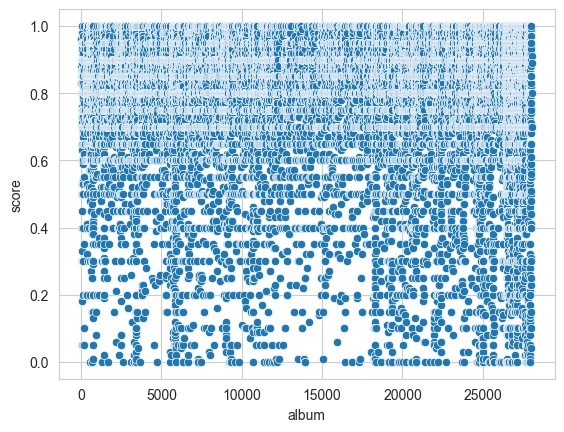

In [12]:
sns.scatterplot(data=reviews,x='album',y='score')

In [13]:
bands.columns

Index(['id', 'name', 'country', 'status', 'formed_in', 'genre', 'theme',
       'active'],
      dtype='object')

In [14]:
Spotify_df.columns

Index(['Name', 'Genres', 'Popularity', 'Followers', 'Artist_URI'], dtype='object')

In [15]:
newDBdf.columns

Index(['artist', 'asin', 'media', 'review_count', 'star_rating', 'title',
       'year', 'Unnamed: 7'],
      dtype='object')

In [16]:
bands.loc[bands['status']=='Split-up']

,id,name,country,status,formed_in,genre,theme,active
1,2,(sic),United States,Split-up,1993.0,Death Metal,NaN,1993-1996
4,5,12 Days of Anarchy,United States,Split-up,1998.0,Death Metal,Anarchy,1998-2002
8,9,6 Feet Under,Germany,Split-up,NaN,Death Metal,NaN,NaN
10,11,7th Delirium,Spain,Split-up,1998.0,Death Metal,NaN,1998-?
11,12,7th Gate,Austria,Split-up,NaN,Death Metal,NaN,NaN
...,...,...,...,...,...,...,...,...
37703,37704,Kalögena,Germany,Split-up,1993.0,Death/Thrash Metal with Gothic influences (ear...,Fun| Social| Fantasy| Horror,1993-?
37705,37706,Massacra,France,Split-up,1986.0,Death/Thrash Metal (1986-1992)| Heavy/Thrash M...,Genocide| Killing| Violence| Destruction,1986-1997
37710,37711,St. Valentine's Day,Ukraine,Split-up,NaN,Doom/Death Metal (early)| Doom/Post-Metal/Elec...,NaN,NaN
37713,37714,Theatre of Tragedy,Norway,Split-up,1993.0,Gothic/Doom/Death Metal (early)| Industrial/El...,Beauty| Darkness| Love| Life,1993 (as Suffering Grief)| 1993 (as La Reine N...


In [17]:
BANDS_DF=bands[['id','name','country','status','genre',]]

In [18]:
BANDS_DF

,id,name,country,status,genre
0,1,('M') Inc.,United States,Unknown,Death Metal
1,2,(sic),United States,Split-up,Death Metal
2,3,.F.O.A.D.,France,Active,Death Metal
3,4,100 Suns,United States,Active,Death Metal
4,5,12 Days of Anarchy,United States,Split-up,Death Metal
...,...,...,...,...,...
37718,37719,Gladiator,Slovakia,Active,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...
37719,37720,Innersight,Hungary,Active,Post-Rock (early)| Progressive Death Metal (mi...
37720,37721,Lunarsapian,International,Active,Black/Death/Doom Metal (early)| Drone/Dark Amb...
37721,37722,Subconscious,Germany,Active,Progressive Thrash/Death Metal (1992| 2002-pre...


In [19]:
Spotify_df['validation']=[True if x in BANDS_DF.name.values else False for x in Spotify_df.Name]

In [20]:
Spotify_df

,Name,Genres,Popularity,Followers,Artist_URI,validation
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk,False
1,Gojira,"alternative metal, french death metal, french ...",61,1239549,spotify:artist:0GDGKpJFhVpcjIGF8N6Ewt,True
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu,False
3,In Flames,"alternative metal, gothenburg metal, melodic d...",61,1127923,spotify:artist:57ylwQTnFnIhJh4nu4rxCs,True
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF,False
...,...,...,...,...,...,...
995,Cleansing of the Temple,"christian death metal, christian deathcore",5,1315,spotify:artist:4nNgrGNSI4M9ODTMH5MdNI,False
996,Sentient Horror,swedish death metal,7,6037,spotify:artist:4MNbashXmMvEKIre76REzX,False
997,Purulence,"british death metal, slam death metal",6,2317,spotify:artist:6n2vNeCnk8otr3DpmS6osE,True
998,Emasculated Vituperation,slam death metal,7,916,spotify:artist:6JWlwpjP9WMxELrxX73n4h,False


In [21]:
BANDS_DF.loc[BANDS_DF['name']=='Lorna Shore']

,id,name,country,status,genre


In [22]:
false_Rows=Spotify_df[Spotify_df['validation']==False]
false_Rows

,Name,Genres,Popularity,Followers,Artist_URI,validation
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk,False
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu,False
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF,False
5,Slaughter to Prevail,"russian metal, russian metalcore, slamming dea...",56,551299,spotify:artist:24Oiw7BlvO1BETecDLJt6m,False
6,Emmure,"deathcore, melodic metalcore, metalcore, nu-me...",53,329282,spotify:artist:1C62FV9Cltn9L4c9jAwCyk,False
...,...,...,...,...,...,...
993,The Contradiction,"blackened deathcore, progressive metalcore",7,1664,spotify:artist:1bLy7ijLaJ9G3WLE1ax4pZ,False
994,Dysrhythmia,"dissonant death metal, instrumental rock, jazz...",7,8386,spotify:artist:27kqsn8A5Ab4I3FLrtZFDh,False
995,Cleansing of the Temple,"christian death metal, christian deathcore",5,1315,spotify:artist:4nNgrGNSI4M9ODTMH5MdNI,False
996,Sentient Horror,swedish death metal,7,6037,spotify:artist:4MNbashXmMvEKIre76REzX,False


In [23]:
newDBdf['validation']=[True if x in BANDS_DF.name.values else False for x in newDBdf.artist]
newDBdf

,artist,asin,media,review_count,star_rating,title,year,Unnamed: 7,validation
0,Ministry,B006NTPEXA,"MP3 Music,Audio CD",680,4.8,Psalm 69,1992,NaN,False
1,Mercyful Fate,B004ZW1OW2,"Vinyl,MP3 Music,Audio CD",678,4.8,Don't Break The Oath (Picture Disc),1984,NaN,False
2,Gojira,B00F8PPADE,"Vinyl,MP3 Music,Audio CD",633,4.8,Way of All Flesh,2013,NaN,True
3,Carcass,B000024AZV,"Audio CD,MP3 Music,Vinyl,Audio, Cassette",626,4.8,Heartwork,2013,NaN,True
4,Suicidal Tendencies,B004WQZP1M,"MP3 Music,Audio CD",611,4.8,Suicidal Tendencies (Original Vinyl Edition),1983,NaN,False
...,...,...,...,...,...,...,...,...,...
6305,VARIOUS ARTISTS,B009EFHM30,Audio CD,6,3.4,Gothic Spirits 16 / Various,2013,NaN,False
6306,Saturnus,B0077U70LI,"Audio CD,Audio CD",6,3.4,For The Loveless Lonely Nights 2010 Re-release,2012,NaN,True
6307,Valensia,B000P159AU,Audio CD,6,3.4,Voodoo Music Box,NaN,NaN,False
6308,Spitfire,B00000IKIL,"Audio CD,MP3 Music",11,3.3,The Dead Next Door,1999,NaN,False


In [24]:
BANDS_DF.loc[BANDS_DF['name']=='Mercyful Fate']

,id,name,country,status,genre


In [25]:
newDBdf.loc[newDBdf['artist']=='Gojira']

,artist,asin,media,review_count,star_rating,title,year,Unnamed: 7,validation
2,Gojira,B00F8PPADE,"Vinyl,MP3 Music,Audio CD",633,4.8,Way of All Flesh,2013,NaN,True
43,Gojira,B002N9MJS2,"Audio CD,MP3 Music,Vinyl",1151,4.8,From Mars to Sirius,2014,NaN,True
142,Gojira,B002MT3CRA,"Audio CD,MP3 Music,Vinyl",338,4.8,Terra Incognita,2009,NaN,True
148,Gojira,B000MM1EPG,"Audio CD,MP3 Music,Vinyl",321,4.8,Link,2007,NaN,True


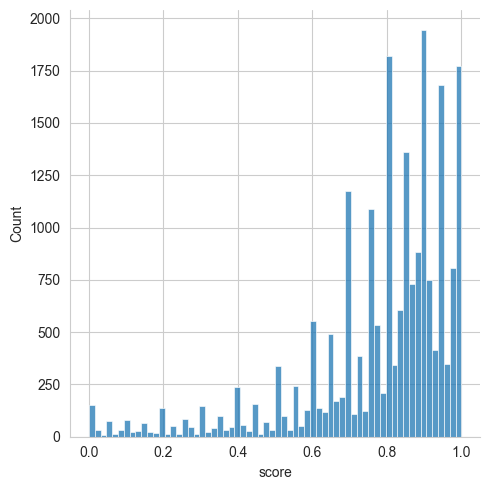

In [26]:
sns.displot(data=reviews['score'])

In [27]:
df_reviews=reviews.copy()
df_reviews.drop(columns=['content'],axis=1,inplace=True)
df_reviews_avg = df_reviews.groupby('album').agg({
    'id': 'first',  # Tomar el primer valor de 'id'
    'title': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,  # Tomar el valor más frecuente de 'title'
    'score': 'mean'  # Calcular la media de 'score'
}).reset_index()

In [28]:
df_reviews_avg

,album,id,title,score
0,4,1,The Killer Count Just Keeps Rising,0.88
1,5,2,A gem of heterogeneous death metal...,0.96
2,8,3,Fantasic| if mostly for its influences,0.83
3,45,4,A rare| lost hidden gem,0.80
4,54,5,Pure| but flayed and covered in soot,0.92
...,...,...,...,...
7900,28058,21505,What Goth Metal Should Sound Like,0.91
7901,28061,21506,Delightful,0.89
7902,28065,21507,Frozen Mist White Noise Paranormal,0.80
7903,28066,21509,Frozen Mist Anomalies Of The Forest,0.80


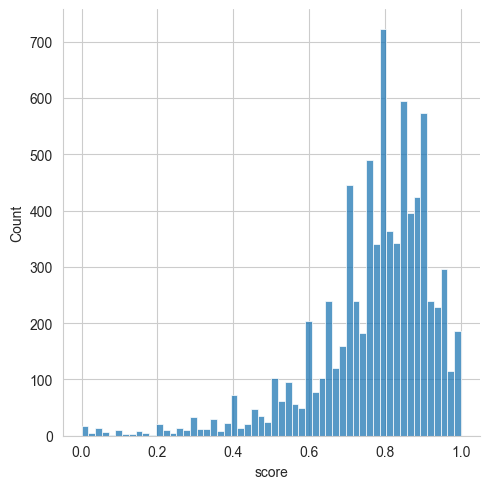

In [29]:
sns.displot(data=df_reviews_avg['score'])

In [30]:
df_reviews_avg.duplicated(subset='album',keep='first').sum()

0

In [31]:
albums

,id,band,title,year
0,1,1,Taste the Hate,2014
1,2,3,The Bringer of Death,2014
2,3,4,Deception| Calculate What You Can't See,2005
3,4,7,Inti Huacay,1998
4,5,7,Génesis & horror,2002
...,...,...,...,...
28064,28065,37723,White Noise Paranormal,2010
28065,28066,37723,Anomalies of the Forest,2011
28066,28067,37723,Mother Earth Pantheon,2012
28067,28068,37723,Paganwinds,2014


In [32]:
BANDS_DF

,id,name,country,status,genre
0,1,('M') Inc.,United States,Unknown,Death Metal
1,2,(sic),United States,Split-up,Death Metal
2,3,.F.O.A.D.,France,Active,Death Metal
3,4,100 Suns,United States,Active,Death Metal
4,5,12 Days of Anarchy,United States,Split-up,Death Metal
...,...,...,...,...,...
37718,37719,Gladiator,Slovakia,Active,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...
37719,37720,Innersight,Hungary,Active,Post-Rock (early)| Progressive Death Metal (mi...
37720,37721,Lunarsapian,International,Active,Black/Death/Doom Metal (early)| Drone/Dark Amb...
37721,37722,Subconscious,Germany,Active,Progressive Thrash/Death Metal (1992| 2002-pre...


In [33]:
df_reviews_avg.columns

Index(['album', 'id', 'title', 'score'], dtype='object')

In [34]:
BANDS_DF.columns

Index(['id', 'name', 'country', 'status', 'genre'], dtype='object')

In [35]:
albums.columns

Index(['id', 'band', 'title', 'year'], dtype='object')

In [36]:
merged_df = pd.merge(df_reviews_avg, albums, left_on='album', right_on='id', suffixes=('_review', '_album'))
merged_df = pd.merge(merged_df, BANDS_DF, left_on='band', right_on='id', suffixes=('', '_band'))

In [37]:
merged_df

,album,id_review,title_review,score,id_album,band,title_album,year,id,name,country,status,genre
0,4,1,The Killer Count Just Keeps Rising,0.88,4,7,Inti Huacay,1998,7,1917,Argentina,Active,Death Metal
1,5,2,A gem of heterogeneous death metal...,0.96,5,7,Génesis & horror,2002,7,1917,Argentina,Active,Death Metal
2,8,3,Fantasic| if mostly for its influences,0.83,8,7,Vox Fatum,2007,7,1917,Argentina,Active,Death Metal
3,45,4,A rare| lost hidden gem,0.80,45,32,Funkin' Murderers,1995,32,Abaddon,United States,Split-up,Death Metal
4,54,5,Pure| but flayed and covered in soot,0.92,54,53,When Depravity Incarnates,2011,53,Abhordium,Finland,Active,Death Metal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7900,28058,21505,What Goth Metal Should Sound Like,0.91,28058,37723,Weeping Redolence,2005,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7901,28061,21506,Delightful,0.89,28061,37723,Godforsaken,2006,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7902,28065,21507,Frozen Mist White Noise Paranormal,0.80,28065,37723,White Noise Paranormal,2010,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7903,28066,21509,Frozen Mist Anomalies Of The Forest,0.80,28066,37723,Anomalies of the Forest,2011,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...


In [81]:
merged_df.loc[merged_df['id']==37723]

,album,id_review,title_review,score,id_album,band,title_album,year,id,name,country,status,genre
7900,28058,21505,What Goth Metal Should Sound Like,0.91,28058,37723,Weeping Redolence,2005,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7901,28061,21506,Delightful,0.89,28061,37723,Godforsaken,2006,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7902,28065,21507,Frozen Mist White Noise Paranormal,0.80,28065,37723,White Noise Paranormal,2010,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7903,28066,21509,Frozen Mist Anomalies Of The Forest,0.80,28066,37723,Anomalies of the Forest,2011,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...
7904,28067,21510,Frozen Mist - Mother Earth Pantheon,0.70,28067,37723,Mother Earth Pantheon,2012,37723,Frozen Mist,United States,Active,Gothic Metal (2004-2006)| Melodic Death/Gothic...


In [78]:
reviews.loc[reviews['album']==28050]

,id,album,title,score,content


In [82]:
df_filtered_rev=merged_df.copy()
df_filtered_rev.drop(columns=['title_review','id_review','album','id'],axis=1,inplace=True)
df_filtered_avg = df_filtered_rev.groupby('band').agg({
    'id_album': 'first',  # Tomar el primer valor de 'id'
    'title_album': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,  # Tomar el valor más frecuente de 'title'
    'year': 'first',
    'name':'first',
    'country':'first',
    'status':'first',
    'genre':'first',
    'score': 'mean'  # Calcular la media de 'score'
}).reset_index()


In [83]:
df_filtered_avg

,band,id_album,title_album,year,name,country,status,genre,score
0,7,4,Génesis & horror,1998,1917,Argentina,Active,Death Metal,0.890000
1,32,45,Funkin' Murderers,1995,Abaddon,United States,Split-up,Death Metal,0.800000
2,53,54,When Depravity Incarnates,2011,Abhordium,Finland,Active,Death Metal,0.920000
3,87,62,Doutrine of False Martyr,2003,Abominattion,Brazil,Split-up,Death Metal,0.575000
4,93,65,Engineering the Dead,1999,Aborted,Belgium,Active,Death Metal,0.780811
...,...,...,...,...,...,...,...,...,...
4437,37713,27998,A Chorus of Obliteration,2004,The Showdown,United States,On hold,Melodic Thrash/Death Metal/Metalcore (early)| ...,0.622500
4438,37714,28002,Assembly,1995,Theatre of Tragedy,Norway,Split-up,Gothic/Doom/Death Metal (early)| Industrial/El...,0.812976
4439,37718,28009,A Holocaust in Your Head,1989,Extreme Noise Terror,United Kingdom,Active,Crust/Grindcore (early)| Hardcore Punk/Death M...,0.662267
4440,37719,28016,Designation,1992,Gladiator,Slovakia,Active,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...,0.880000


In [40]:
df_filtered_avg.duplicated(subset='band',keep='first').sum()

0

In [84]:
band_count = merged_df.groupby('band').size().reset_index(name='count')

# Ahora unimos este conteo con df_filtered_avg usando una fusión (merge) por la columna 'band'
df_filtered_avg = df_filtered_avg.merge(band_count, on='band', how='left')

In [85]:
df_filtered_avg

,band,id_album,title_album,year,name,country,status,genre,score,count
0,7,4,Génesis & horror,1998,1917,Argentina,Active,Death Metal,0.890000,3
1,32,45,Funkin' Murderers,1995,Abaddon,United States,Split-up,Death Metal,0.800000,1
2,53,54,When Depravity Incarnates,2011,Abhordium,Finland,Active,Death Metal,0.920000,1
3,87,62,Doutrine of False Martyr,2003,Abominattion,Brazil,Split-up,Death Metal,0.575000,1
4,93,65,Engineering the Dead,1999,Aborted,Belgium,Active,Death Metal,0.780811,9
...,...,...,...,...,...,...,...,...,...,...
4437,37713,27998,A Chorus of Obliteration,2004,The Showdown,United States,On hold,Melodic Thrash/Death Metal/Metalcore (early)| ...,0.622500,4
4438,37714,28002,Assembly,1995,Theatre of Tragedy,Norway,Split-up,Gothic/Doom/Death Metal (early)| Industrial/El...,0.812976,7
4439,37718,28009,A Holocaust in Your Head,1989,Extreme Noise Terror,United Kingdom,Active,Crust/Grindcore (early)| Hardcore Punk/Death M...,0.662267,5
4440,37719,28016,Designation,1992,Gladiator,Slovakia,Active,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...,0.880000,1


In [41]:
df_reviews_avg.loc[df_reviews_avg['album']==28002]

,album,id,title,score
7887,28002,21462,Beauty and the beastie,0.8375


In [42]:
albums.loc[albums['band']==37714]

,id,band,title,year
28001,28002,37714,Theatre of Tragedy,1995
28002,28003,37714,Velvet Darkness They Fear,1996
28003,28004,37714,Aégis,1998
28004,28005,37714,Musique,2000
28005,28006,37714,Assembly,2002
28006,28007,37714,Storm,2006
28007,28008,37714,Forever Is the World,2009


In [43]:
Spotify_df['valid']=[True if x in df_filtered_avg.name.values else False for x in Spotify_df.Name]

In [44]:
Spotify_df

,Name,Genres,Popularity,Followers,Artist_URI,validation,valid
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk,False,False
1,Gojira,"alternative metal, french death metal, french ...",61,1239549,spotify:artist:0GDGKpJFhVpcjIGF8N6Ewt,True,True
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu,False,False
3,In Flames,"alternative metal, gothenburg metal, melodic d...",61,1127923,spotify:artist:57ylwQTnFnIhJh4nu4rxCs,True,True
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF,False,False
...,...,...,...,...,...,...,...
995,Cleansing of the Temple,"christian death metal, christian deathcore",5,1315,spotify:artist:4nNgrGNSI4M9ODTMH5MdNI,False,False
996,Sentient Horror,swedish death metal,7,6037,spotify:artist:4MNbashXmMvEKIre76REzX,False,False
997,Purulence,"british death metal, slam death metal",6,2317,spotify:artist:6n2vNeCnk8otr3DpmS6osE,True,False
998,Emasculated Vituperation,slam death metal,7,916,spotify:artist:6JWlwpjP9WMxELrxX73n4h,False,False


In [45]:
remaining_Rows=Spotify_df[Spotify_df['valid']==False]
remaining_Rows

,Name,Genres,Popularity,Followers,Artist_URI,validation,valid
0,Slayer,"alternative metal, death metal, groove metal, ...",64,3717516,spotify:artist:1IQ2e1buppatiN1bxUVkrk,False,False
2,Currents,"melodic metalcore, metalcore, progressive deat...",58,187066,spotify:artist:5pqvAI85RMxL9K0xHvSwGu,False,False
4,Lorna Shore,"blackened deathcore, melodic metalcore, sympho...",57,540632,spotify:artist:6vXYoy8ouRVib302zxaxFF,False,False
5,Slaughter to Prevail,"russian metal, russian metalcore, slamming dea...",56,551299,spotify:artist:24Oiw7BlvO1BETecDLJt6m,False,False
6,Emmure,"deathcore, melodic metalcore, metalcore, nu-me...",53,329282,spotify:artist:1C62FV9Cltn9L4c9jAwCyk,False,False
...,...,...,...,...,...,...,...
995,Cleansing of the Temple,"christian death metal, christian deathcore",5,1315,spotify:artist:4nNgrGNSI4M9ODTMH5MdNI,False,False
996,Sentient Horror,swedish death metal,7,6037,spotify:artist:4MNbashXmMvEKIre76REzX,False,False
997,Purulence,"british death metal, slam death metal",6,2317,spotify:artist:6n2vNeCnk8otr3DpmS6osE,True,False
998,Emasculated Vituperation,slam death metal,7,916,spotify:artist:6JWlwpjP9WMxELrxX73n4h,False,False


In [86]:
original_data=df_filtered_avg.copy()
original_data['active'] = original_data['status'].apply(lambda x: x.strip() == 'Active')
original_data['transitions']=original_data['genre'].apply(lambda x: '|'in str(x))

In [87]:
original_data

,band,id_album,title_album,year,name,country,status,genre,score,count,active,transitions
0,7,4,Génesis & horror,1998,1917,Argentina,Active,Death Metal,0.890000,3,True,False
1,32,45,Funkin' Murderers,1995,Abaddon,United States,Split-up,Death Metal,0.800000,1,False,False
2,53,54,When Depravity Incarnates,2011,Abhordium,Finland,Active,Death Metal,0.920000,1,True,False
3,87,62,Doutrine of False Martyr,2003,Abominattion,Brazil,Split-up,Death Metal,0.575000,1,False,False
4,93,65,Engineering the Dead,1999,Aborted,Belgium,Active,Death Metal,0.780811,9,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
4437,37713,27998,A Chorus of Obliteration,2004,The Showdown,United States,On hold,Melodic Thrash/Death Metal/Metalcore (early)| ...,0.622500,4,False,True
4438,37714,28002,Assembly,1995,Theatre of Tragedy,Norway,Split-up,Gothic/Doom/Death Metal (early)| Industrial/El...,0.812976,7,False,True
4439,37718,28009,A Holocaust in Your Head,1989,Extreme Noise Terror,United Kingdom,Active,Crust/Grindcore (early)| Hardcore Punk/Death M...,0.662267,5,True,True
4440,37719,28016,Designation,1992,Gladiator,Slovakia,Active,Death/Thrash Metal (1988-93)| Grunge/Hard Rock...,0.880000,1,True,True


In [48]:
remaining_Rows['Popularity'].describe()

count    540.000000
mean      21.590741
std       11.971716
min        5.000000
25%       12.000000
50%       19.000000
75%       29.000000
max       64.000000
Name: Popularity, dtype: float64

In [49]:
remaining_Rows['Followers'].describe()

count    5.400000e+02
mean     6.025803e+04
std      1.902677e+05
min      1.900000e+02
25%      5.785000e+03
50%      1.262550e+04
75%      4.691525e+04
max      3.717516e+06
Name: Followers, dtype: float64

In [50]:
# Datos originales
popularity_mean = 21.590741
pop_std_dev = 11.971716
pop_variance = pop_std_dev ** 2

# Calcular los parámetros de la distribución log-normal
mu_pop = np.log(popularity_mean ** 2 / np.sqrt(pop_variance + popularity_mean ** 2))
sigma_pop = np.sqrt(np.log(pop_variance / popularity_mean ** 2 + 1))

# Generar datos aleatorios con la distribución log-normal
data_pop = np.random.lognormal(mean=mu_pop, sigma=sigma_pop, size=1000)

# Asegurarse de que los datos estén en el rango deseado [5, 58]
data_clipped_pop = np.clip(data_pop, 5, 58)

# Imprimir estadísticas básicas de los datos generados
print('Mean:', np.mean(data_clipped_pop))
print('Std deviation:', np.std(data_clipped_pop))
print('Min:', np.min(data_clipped_pop))
print('Max:', np.max(data_clipped_pop))

Mean: 21.696546420267083
Std deviation: 11.1859253438829
Min: 5.0
Max: 58.0


In [51]:
# Datos originales
followers_mean = 6.025803e+04
followers_var = 190200 ** 2  # Variance, not standard deviation

# Calcular los parámetros de la distribución log-normal
mu_fol = np.log(followers_mean**2 / np.sqrt(followers_var + followers_mean**2))
sigma_fol = np.sqrt(np.log(followers_var / followers_mean**2 + 1))

# Generar datos aleatorios con la distribución log-normal
data_fol = np.random.lognormal(mean=mu_fol, sigma=sigma_fol, size=1000)

# Asegurarse de que los datos estén en el rango deseado [min_followers, max_followers]
min_followers = 190
max_followers = 679904
data_clipped_fol = np.clip(data_fol, min_followers, max_followers)

# Imprimir estadísticas básicas de los datos generados
print('Mean:', np.mean(data_clipped_fol))
print('Std deviation:', np.std(data_clipped_fol))
print('Min:', np.min(data_clipped_fol))
print('Max:', np.max(data_clipped_fol))

Mean: 47660.23754251498
Std deviation: 90489.866433979
Min: 190.0
Max: 679904.0


<Axes: xlabel='Followers', ylabel='Count'>

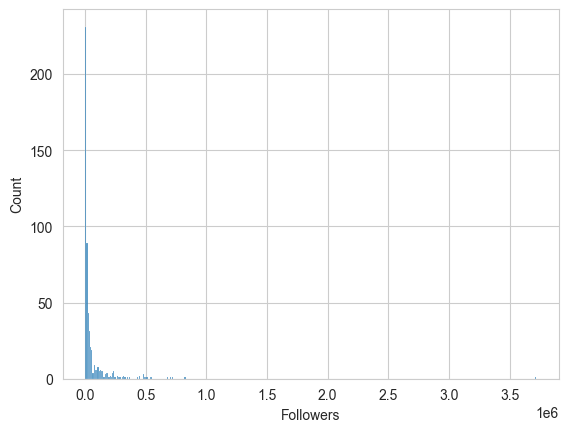

In [52]:
sns.histplot(data=remaining_Rows['Followers'])

In [88]:
original_data['followers']=original_data.apply(lambda x:round(np.random.lognormal(mean=mu_fol, sigma=sigma_fol),0),axis=1)
original_data['Popularity']=original_data.apply(lambda x:round(np.random.lognormal(mean=mu_pop, sigma=sigma_pop),0),axis=1)
filtered_original=original_data.copy()
filtered_original.drop(columns=['status', 'year', 'id_album', 'title_album'], axis=1, inplace=True)


In [89]:
features_df=filtered_original[['band','score','active','transitions','followers','Popularity','count']]
features_df.rename(columns={'Popularity':'popularity'},inplace=True)
features_df

,band,score,active,transitions,followers,popularity,count
0,7,0.890000,True,False,61658.0,22.0,3
1,32,0.800000,False,False,234.0,23.0,1
2,53,0.920000,True,False,5792.0,28.0,1
3,87,0.575000,False,False,30979.0,13.0,1
4,93,0.780811,True,False,261388.0,53.0,9
...,...,...,...,...,...,...,...
4437,37713,0.622500,False,True,6356.0,19.0,4
4438,37714,0.812976,False,True,2904.0,18.0,7
4439,37718,0.662267,True,True,1159.0,69.0,5
4440,37719,0.880000,True,True,22450.0,11.0,1


<Axes: xlabel='score', ylabel='popularity'>

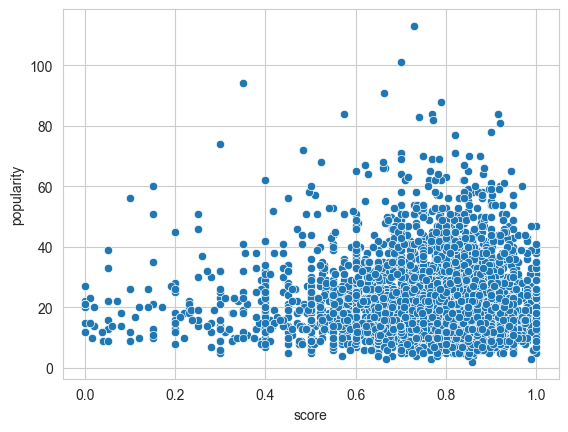

In [55]:
sns.scatterplot(data=features_df,x='score',y='popularity')

<Axes: xlabel='followers', ylabel='score'>

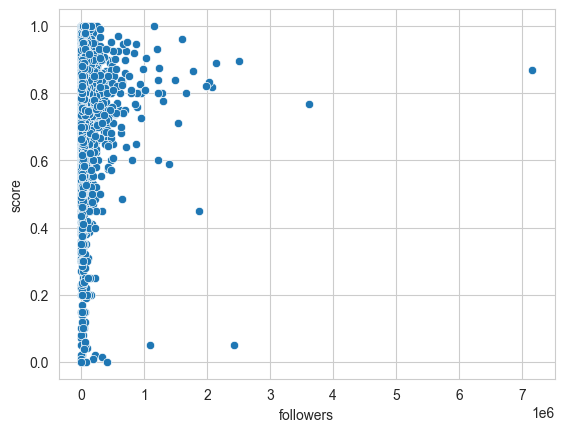

In [56]:
sns.scatterplot(data=features_df,x='followers',y='score')

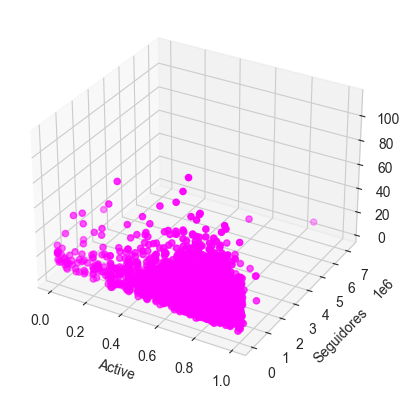

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Realizar el gráfico de dispersión
ax.scatter(features_df['score'], features_df['followers'], features_df['popularity'], c='magenta', marker='o')

# Añadir etiquetas
ax.set_xlabel('Active')
ax.set_ylabel('Seguidores')
ax.set_zlabel('score')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='score', ylabel='popularity'>

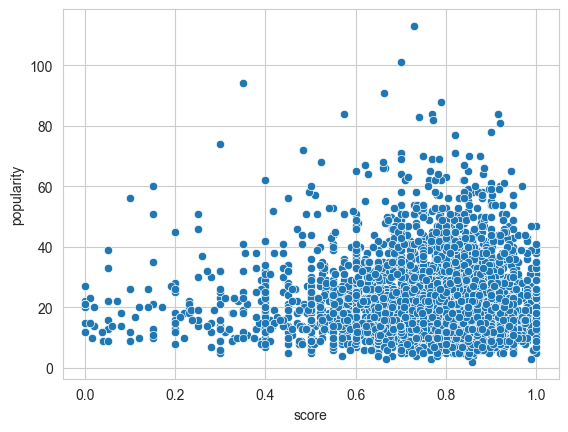

In [58]:
sns.scatterplot(data=features_df,x='score',y='popularity')

<Axes: xlabel='count', ylabel='score'>

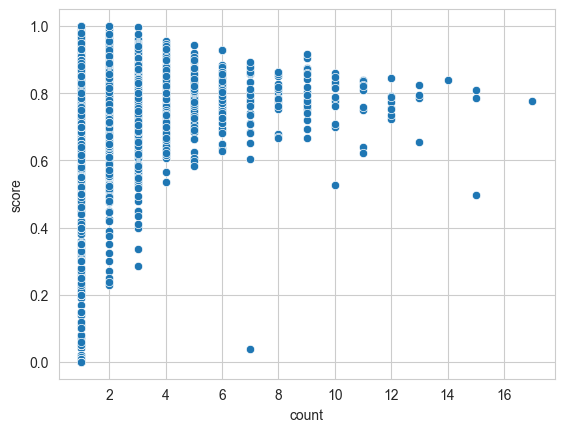

In [90]:
sns.scatterplot(data=features_df,x='count',y='score')

<Axes: xlabel='count', ylabel='followers'>

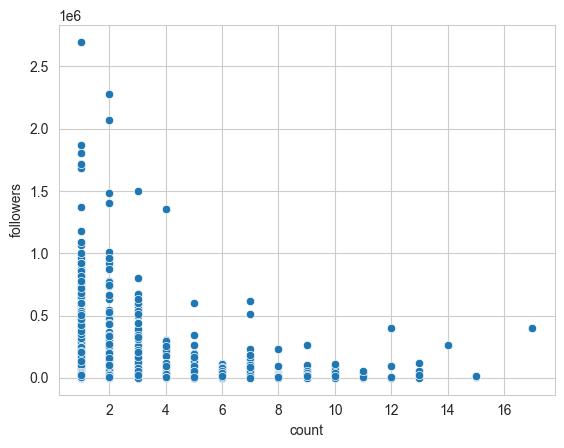

In [91]:
sns.scatterplot(data=features_df,x='count',y='followers')

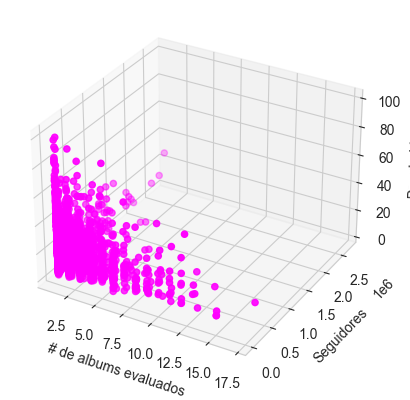

In [93]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Realizar el gráfico de dispersión
ax.scatter(features_df['count'], features_df['followers'], features_df['popularity'], c='magenta', marker='o')

# Añadir etiquetas
ax.set_xlabel('# de albums evaluados')
ax.set_ylabel('Seguidores')
ax.set_zlabel('Popularidad')

# Mostrar el gráfico
plt.show()

<Axes: xlabel='count', ylabel='popularity'>

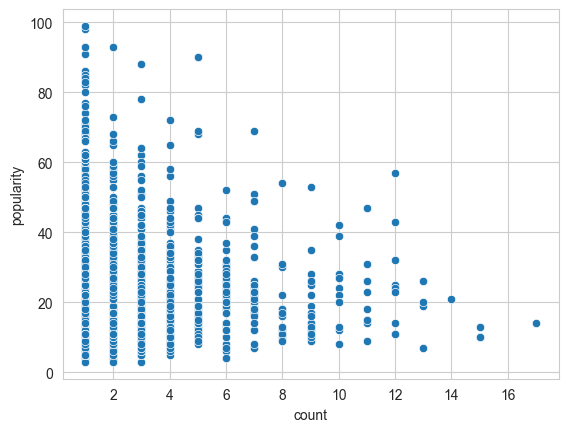

In [94]:
sns.scatterplot(data=features_df,x='count',y='popularity')

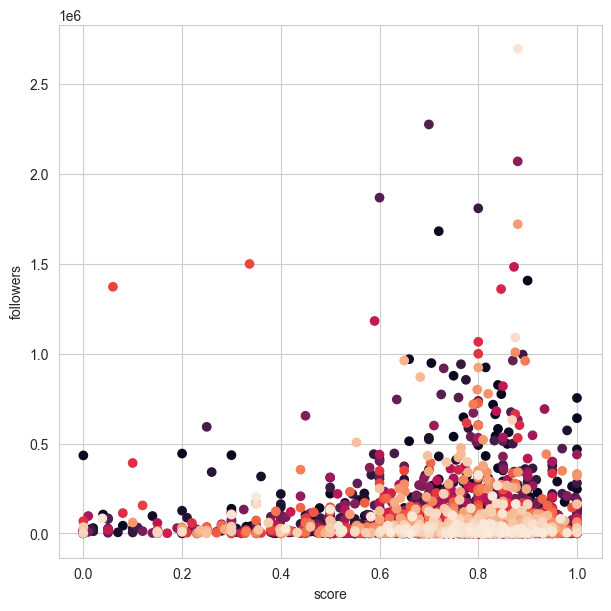

In [113]:
x=np.linspace(0,10,len(features_df))
y=2*x**2+np.random.randn(len(features_df))
col=x+y
fig, ax=plt.subplots(figsize=(6,6),layout='constrained')
ax.scatter(features_df['score'],features_df['followers'],c=col)
ax.set_xlabel('score')
ax.set_ylabel('followers')
plt.savefig('dist.png')
plt.show()

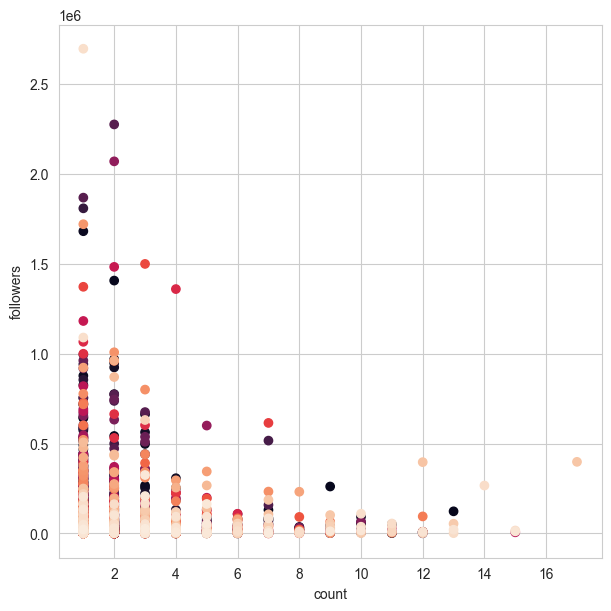

In [110]:
x=np.linspace(0,10,len(features_df))
y=2*x**2+np.random.randn(len(features_df))
col=x+y
fig, ax=plt.subplots(figsize=(6,6),layout='constrained')
ax.scatter(features_df['count'],features_df['followers'],c=col)
ax.set_xlabel('count')
ax.set_ylabel('followers')
plt.savefig('dist2.png')
plt.show()

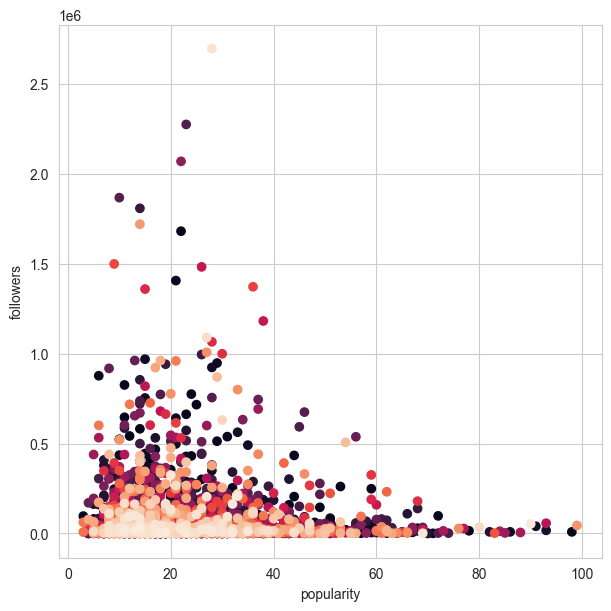

In [112]:
x=np.linspace(0,10,len(features_df))
y=2*x**2+np.random.randn(len(features_df))
col=x+y
fig, ax=plt.subplots(figsize=(6,6),layout='constrained')
ax.scatter(features_df['popularity'],features_df['followers'],c=col)
ax.set_xlabel('popularity')
ax.set_ylabel('followers')
plt.savefig('dist3.png')
plt.show()

In [114]:
features_df.columns

Index(['band', 'score', 'active', 'transitions', 'followers', 'popularity',
       'count'],
      dtype='object')

In [120]:
features_df['active'] = features_df['active'].astype(int)
features_df['transitions'] = features_df['transitions'].astype(int)

# Preparar los datos
X = features_df[['score','active', 'transitions','popularity','count']]  # Variables independientes
y = features_df['followers']  # Variable dependiente

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
rf = RandomForestRegressor(n_estimators=300, random_state=42,min_samples_split= 2, min_samples_leaf= 4, max_depth= 10, bootstrap= True)
rf.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = rf.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 142718.49012867513


In [122]:
r2_dt = r2_score(y_test,y_pred)
print(r2_dt)

-0.025445862361217708


In [123]:
# Definir el espacio de búsqueda
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Crear el modelo base
rf = RandomForestRegressor()

# Crear la búsqueda aleatoria
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=100,  # Número de combinaciones de parámetros a probar
    cv=3,        # Número de pliegues en la validación cruzada
    verbose=2,   # Controla la verbosidad: cuanto mayor es el número, más mensajes
    random_state=42,
    n_jobs=-1    # Número de trabajos para correr en paralelo (-1 significa usar todos los procesadores)
)

# Ajustar la búsqueda aleatoria
rf_random.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print(rf_random.best_params_)

# Evaluar el mejor modelo encontrado
best_model = rf_random.best_estimator_


Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10, 'bootstrap': True}
